In [43]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [44]:
#Загрузка дынных
mydata = pd.read_csv("D:\Study\DataBase\Data.csv")
mydata

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Netherlands,Eredivisie,(UTR),Gyrano Kerk,24,0,2155,10,7.49,0.33,50,18,2.20,0.79,2020
656,Netherlands,Eredivisie,(AJA),Quincy Promes,18,2,1573,12,9.77,0.59,56,30,3.38,1.81,2020
657,Netherlands,Eredivisie,(PSV),Denzel Dumfries,25,0,2363,7,5.72,0.23,45,14,1.81,0.56,2020
658,Netherlands,Eredivisie,NaN,Cyriel Dessers,26,0,2461,15,14.51,0.56,84,43,3.24,1.66,2020


In [45]:
#Добавление нового атрибута Accuracy: точность ударов по воротам(в процентах) = кол-во ударов в створ ворот / кол-во ударов * 100
df = pd.DataFrame.from_dict(mydata)
valuesColumnShots = df['Shots'] 

valuesColumnOnTarget = df['OnTarget'] 

df['Accuracy'] = None

for i in range(660):
    df.at[i, 'Accuracy'] = round(valuesColumnOnTarget[i] / valuesColumnShots[i] * 100)
df

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year,Accuracy
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016,42
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016,47
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016,48
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016,36
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Netherlands,Eredivisie,(UTR),Gyrano Kerk,24,0,2155,10,7.49,0.33,50,18,2.20,0.79,2020,36
656,Netherlands,Eredivisie,(AJA),Quincy Promes,18,2,1573,12,9.77,0.59,56,30,3.38,1.81,2020,54
657,Netherlands,Eredivisie,(PSV),Denzel Dumfries,25,0,2363,7,5.72,0.23,45,14,1.81,0.56,2020,31
658,Netherlands,Eredivisie,NaN,Cyriel Dessers,26,0,2461,15,14.51,0.56,84,43,3.24,1.66,2020,51


In [46]:
#Удаление строк с пропущенными значениями(из прошлой работы их количесвто = 34)
df.dropna(inplace=True)
df

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year,Accuracy
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016,42
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016,47
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016,48
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016,36
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,Netherlands,Eredivisie,(RZA),Haris Vuckic,23,2,2194,11,6.00,0.26,38,17,1.65,0.74,2020,45
655,Netherlands,Eredivisie,(UTR),Gyrano Kerk,24,0,2155,10,7.49,0.33,50,18,2.20,0.79,2020,36
656,Netherlands,Eredivisie,(AJA),Quincy Promes,18,2,1573,12,9.77,0.59,56,30,3.38,1.81,2020,54
657,Netherlands,Eredivisie,(PSV),Denzel Dumfries,25,0,2363,7,5.72,0.23,45,14,1.81,0.56,2020,31


In [47]:
#Проверка на дубликаты
duplicate_count = df.duplicated().sum()
print(f"Количество дубликатов: {duplicate_count}")

Количество дубликатов: 0


In [48]:
#Признаки кластеризации
fMatchesSubst = df[['Matches_Played', 'Substitution']]
fGoalsXG = df[['Goals', 'xG']]
fShotsOnTarget = df[['Shots', 'OnTarget']]
fMatchesGoals = df[['Matches_Played', 'Goals']]

In [49]:
# Создание kmeans
kmeansMatchesSubst = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeansGoalsXG = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeansShotsOnTarget = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeansMatchesGoals = KMeans(n_clusters=3, n_init=10, random_state=42)

In [50]:
# Кластеризация
df['clusterMatchesSubst'] = kmeansMatchesSubst.fit_predict(fMatchesSubst)
df['clusterGoalsXG'] = kmeansGoalsXG.fit_predict(fGoalsXG)
df['clusterShotsOnTarget'] = kmeansShotsOnTarget.fit_predict(fShotsOnTarget)
df['clusterMatchesGoals'] = kmeansMatchesGoals.fit_predict(fMatchesGoals)

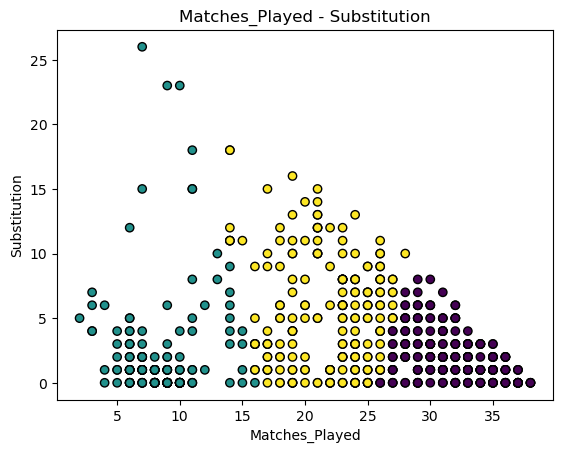

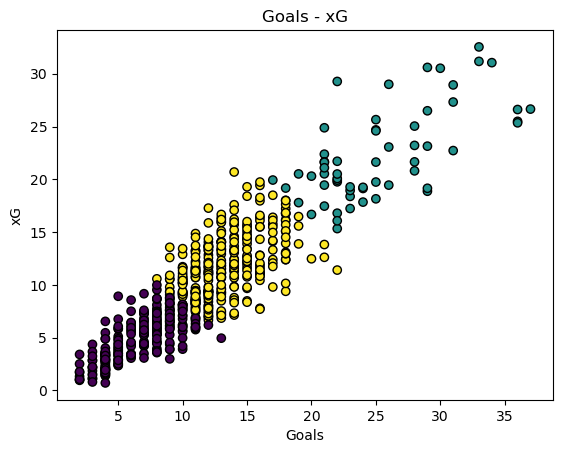

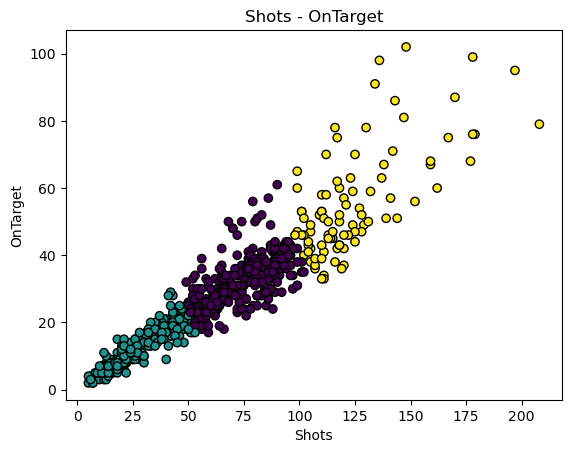

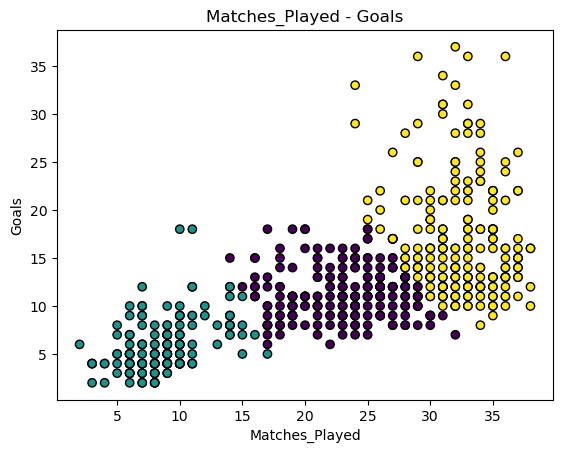

In [51]:
# Визуализация кластеров
plt.scatter(df['Matches_Played'], df['Substitution'], c=df['clusterMatchesSubst'], cmap='viridis', edgecolor='k')
plt.xlabel('Matches_Played')
plt.ylabel('Substitution')
plt.title('Matches_Played - Substitution')
plt.show()

plt.scatter(df['Goals'], df['xG'], c=df['clusterGoalsXG'], cmap='viridis', edgecolor='k')
plt.xlabel('Goals')
plt.ylabel('xG')
plt.title('Goals - xG')
plt.show()

plt.scatter(df['Shots'], df['OnTarget'], c=df['clusterShotsOnTarget'], cmap='viridis', edgecolor='k')
plt.xlabel('Shots')
plt.ylabel('OnTarget')
plt.title('Shots - OnTarget')
plt.show()

plt.scatter(df['Matches_Played'], df['Goals'], c=df['clusterMatchesGoals'], cmap='viridis', edgecolor='k')
plt.xlabel('Matches_Played')
plt.ylabel('Goals')
plt.title('Matches_Played - Goals')
plt.show()

In [52]:
#ВЫвод: В ходе работы были выполнены следующие шаги: Добавлен новый атрибут, вычисляющий точность ударов игроков.
#Модель KMeans была создана с заданным числом кластеров (n_clusters = 3)
#Знакомство с методом кластеризации KMeans в библиотеке scikit-learn позволило понять базовые шаги применения алгоритма, 
#его возможности и потенциал для кластеризации данных. Для более глубокого понимания метода и оптимизации его применения 
#важно дополнительное изучение методов оценки качества кластеризации, выбора оптимальных параметров и анализа результатов.
#Помимо основных этапов работы с методом кластеризации KMeans, следует отметить, что визуальное представление данных на 
#графике подтверждает правильность выбора данного метода для кластеризации в данной ситуации.
#На графике зависимости переменных были видны выраженные группировки точек, которые подтверждали возможность их разделения 
#на отдельные кластеры. Метод KMeans, в свою очередь, эффективно провел кластеризацию, что отразилось на понятной и 
#интерпретируемой визуализации.